# Introduction to Deep Learning Using Keras

[Keras](https://keras.io/) is a high-level API for deep learning. It is written in Python and can run on top of [Theano](http://deeplearning.net/software/theano/) or [TensorFlow](https://www.tensorflow.org/), two very popular libraries for neural networks in Python. It allows users to implement deep learning models very fast and with minimum effort. In the past years, the contribution of Keras to research in deep learning has been significant since it has allowed researchers to go from ideas to results with the least possible delay.



In this part of the lab, we will implement a simple feedforward neural network to perform classification on a synthetic dataset, of two classes. Your first objective is to create this dataset. It will consist of 200 points in the 2-dimensional space $(N = 200, d = 2)$. Each point will belong either to class 0 or to class 1 (100 points per class), drawn from a Gaussian distribution: 

$$
    \mathbf{x}_i \sim \mathcal{N}(\boldsymbol \mu_k, \boldsymbol \Sigma_k)
$$

for class $k$. For class 0, $\boldsymbol{\mu}_0 = [1,1]$ and standard deviation $0.5$ for each dimension. For class 1, $\boldsymbol{\mu}_1 = [-1,-1]$ and standard deviation $0.5$. To generate these values make use of the [`randn`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html) function of NumPy that returns a sample from the "standard normal" distribution as follows: 

```python
sd * np.random.randn(...) + mu
```

In [17]:
import numpy as np

N = 200
d = 2
num_classes = 2

X = np.zeros((N, d))
y = np.zeros(N, dtype=np.int64)


#your code here
cut=N//2
# classe zero
X[:cut,:]=0.5 * np.random.randn(cut,2) + (1,1)
y[:cut]=0
# classe 1
X[cut:,:]=0.5 * np.random.randn(cut,2) +(-1,-1)
y[cut:]=1


After generating the 200 points, plot them in a 2-dimensional plane using [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter). Use the same color for points belonging to the same class.

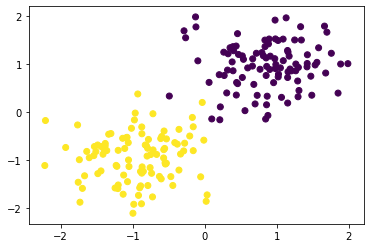

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

#your code here
plt.scatter(x=X[:,0],y=X[:,1],c=y)

Then, split the dataset into a training and a test set using the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of scikit-learn. Set the proportion of the dataset to be included in the test set to 0.2.

In [19]:
from sklearn.model_selection import train_test_split

#your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now you will use Keras to implement a simple feedforward neural network. In Keras, of particular importance is the notion of a model. The model is the data structure upon which the neural network is built. The most common type of model is the Sequential model, which corresponds to a linear stack of layers. We next initialize a Sequential model.

In [35]:
from tensorflow.keras.models import Sequential

model = Sequential()

After creating a Sequence, we can add layers to it. In this example, we will add a hidden layer and the output layer. The hidden layer will consist of 64 hidden units and the output of each neuron will be activated by the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. The output layer will contain 1 neuron which corresponds to the probability that an instance belongs to class 1 of our problem. 
Both these layers are fully-connected neural network layers and can be implemented using the [Dense](https://keras.io/layers/core/#dense) class of Keras.

In [36]:
from tensorflow.keras.layers import Dense

#your code here
model.add(Dense(units=64, activation='relu'   , input_shape=(2,) ))
model.add(Dense(units=1,  activation='sigmoid', input_shape=(64,)))

After defining the model, we compile it to configure its learning process. More specifically, we can specify the loss function and the optimizer and its parameters.

In [37]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import SGD

model.compile(loss=binary_crossentropy, optimizer=SGD(lr=0.01, momentum=0.9))

Once compiled, we can train the model by iterating on the training data in batches.

In [38]:
model.fit(X_train, y_train, epochs=5, batch_size=16)
# epochs = how many times we try to fit the entire train set
# batch_size = we give a chunck of train data to get outputs, calculate the error and backpropagate

Train on 160 samples
Epoch 1/5
160/160 [==============================] - 0s 3ms/sample - loss: 0.5458
Epoch 2/5
160/160 [==============================] - 0s 151us/sample - loss: 0.3836
Epoch 3/5
160/160 [==============================] - 0s 165us/sample - loss: 0.2437
Epoch 4/5
160/160 [==============================] - 0s 178us/sample - loss: 0.1611
Epoch 5/5
160/160 [==============================] - 0s 184us/sample - loss: 0.1166


Once trained, we can use your model to generate predictions on new data. Predictions are real values between 0 and 1. Set predictions larger than 0.5 to 1 and predictions smaller than 0.5 to 0.

In [39]:
y_pred = model.predict(X_test, batch_size=16)[:,0]

#your code here
#my_pred=y_pred.apply(lambda x:1 if x >0.5 else 0)
mypred=[1 if x > 0.5 else 0 for x in y_pred]

Finally, we will calculate the accuracy of the model by comparing the predictions against the ground truth class labels. Use the [`accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function of scikit-learn to compute the accuracy.

In [40]:
from sklearn.metrics import accuracy_score

#your code here
score=accuracy_score(y_test, mypred)
print(score)

1.0


Using the `pcolormesh` function, we can plot the decision surface of the network with regard to the input space. This is demonstrated as follows. Use your code from above (using `scatter`) to plot the data points over this surface.

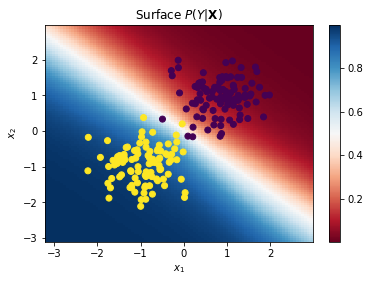

In [41]:
plt.figure()
xx1, xx2 = np.meshgrid(
    np.linspace(min(X[:,0]-1),max(X[:,0]+1),num=100), 
    np.linspace(min(X[:,1]-1),max(X[:,1]+1),num=100)
)
p_y = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
plt.pcolormesh(xx1, xx2, p_y.reshape(*xx1.shape), cmap='RdBu')
plt.colorbar()
plt.title("Surface $P(Y | \mathbf{X})$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.scatter(X[:,0], X[:,1], c=y)

Replace half of the points for class 1 at with points sampled from a Gaussian at $\boldsymbol \mu = [0,3]$ (same standard deviation as other points), so as to form a second 'ball' of points for this class. Run the code again, and note how the decision surface changes.

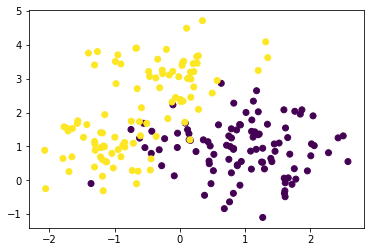

In [80]:
#your code here
cut=N//2
# classe zero : purple
X[:cut,:]=0.7 * np.random.randn(cut,2) + (1,1)
y[:cut]=0
# classe 1 : yellow
X[cut:150,:]=0.5 * np.random.randn(50,2) + (-1,1)
X[150:,:]=0.6 * np.random.randn(50,2) +(0,3)
y[cut:]=1

plt.scatter(x=X[:,0],y=X[:,1],c=y)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
model_2 = Sequential()
model_2.add(Dense(units=64, activation='relu'   , input_shape=(2,) ))
model_2.add(Dense(units=16,  activation='relu', input_shape=(64,)))
model_2.add(Dense(units=1,  activation='sigmoid', input_shape=(16,)))
model_2.compile(loss=binary_crossentropy, optimizer=SGD(lr=0.01, momentum=0.9))
model_2.fit(X_train, y_train, epochs=10, batch_size=16)

Train on 160 samples
Epoch 1/10
160/160 [==============================] - 0s 3ms/sample - loss: 0.6587
Epoch 2/10
160/160 [==============================] - 0s 158us/sample - loss: 0.4939
Epoch 3/10
160/160 [==============================] - 0s 178us/sample - loss: 0.3901
Epoch 4/10
160/160 [==============================] - 0s 172us/sample - loss: 0.3129
Epoch 5/10
160/160 [==============================] - 0s 197us/sample - loss: 0.2680
Epoch 6/10
160/160 [==============================] - 0s 173us/sample - loss: 0.2433
Epoch 7/10
160/160 [==============================] - 0s 185us/sample - loss: 0.2303
Epoch 8/10
160/160 [==============================] - 0s 189us/sample - loss: 0.2190
Epoch 9/10
160/160 [==============================] - 0s 188us/sample - loss: 0.2084
Epoch 10/10
160/160 [==============================] - 0s 183us/sample - loss: 0.2017


In [83]:
y_pred_2 = model_2.predict(X_test, batch_size=16)[:,0]

mypred_2=[1 if x > 0.5 else 0 for x in y_pred_2]
score_2=accuracy_score(y_test, mypred_2)
print(score_2)

0.875


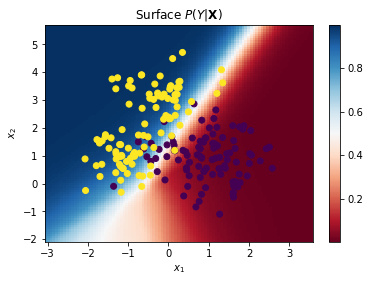

In [84]:
plt.figure()
xx1, xx2 = np.meshgrid(
    np.linspace(min(X[:,0]-1),max(X[:,0]+1),num=100), 
    np.linspace(min(X[:,1]-1),max(X[:,1]+1),num=100)
)
p_y = model_2.predict(np.c_[xx1.ravel(), xx2.ravel()])
plt.pcolormesh(xx1, xx2, p_y.reshape(*xx1.shape), cmap='RdBu')
plt.colorbar()
plt.title("Surface $P(Y | \mathbf{X})$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
# Now, 2 classes, but different shape : XOR problem

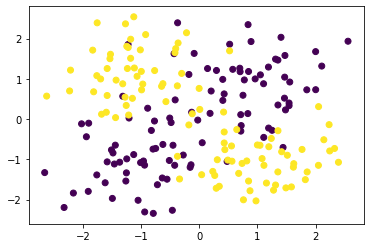

In [109]:
cut=N//4
std=0.7

# classe zero : purple
X[:cut,:]=std * np.random.randn(cut,2) + (1,1)
y[:cut]=0
X[cut:2*cut,:]=std * np.random.randn(cut,2) + (-1,-1)
y[cut:2*cut]=0

# classe 1 : yellow
X[2*cut:3*cut,:]=std * np.random.randn(cut,2) + (-1,1)
y[2*cut:3*cut]=1
X[3*cut:4*cut,:]=std * np.random.randn(cut,2) + (1,-1)
y[3*cut:4*cut]=1

plt.scatter(x=X[:,0],y=X[:,1],c=y)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_xor = Sequential()
model_xor.add(Dense(units=64, activation='relu'   , input_shape=(2,) )) # not linear
#model_xor.add(Dense(units=64, activation='linear'   , input_shape=(2,) ))  # linear : not good as problem not linear
model_xor.add(Dense(units=1,  activation='sigmoid', input_shape=(64,)))
model_xor.compile(loss=binary_crossentropy, optimizer=SGD(lr=0.01, momentum=0.9))
model_xor.fit(X_train, y_train, epochs=5, batch_size=16)

Train on 160 samples
Epoch 1/5
160/160 [==============================] - 0s 3ms/sample - loss: 0.7171
Epoch 2/5
160/160 [==============================] - 0s 145us/sample - loss: 0.6614
Epoch 3/5
160/160 [==============================] - 0s 162us/sample - loss: 0.5991
Epoch 4/5
160/160 [==============================] - 0s 152us/sample - loss: 0.5428
Epoch 5/5
160/160 [==============================] - 0s 152us/sample - loss: 0.5010


0.85


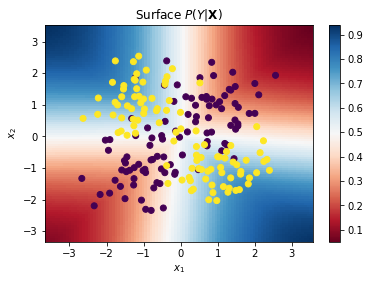

In [111]:
y_pred_xor = model_xor.predict(X_test, batch_size=16)[:,0]

mypred_xor=[1 if x > 0.5 else 0 for x in y_pred_xor]
score_xor=accuracy_score(y_test, mypred_xor)
print(score_xor)

plt.figure()
xx1, xx2 = np.meshgrid(
    np.linspace(min(X[:,0]-1),max(X[:,0]+1),num=100), 
    np.linspace(min(X[:,1]-1),max(X[:,1]+1),num=100)
)
p_y = model_xor.predict(np.c_[xx1.ravel(), xx2.ravel()])
plt.pcolormesh(xx1, xx2, p_y.reshape(*xx1.shape), cmap='RdBu')
plt.colorbar()
plt.title("Surface $P(Y | \mathbf{X})$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.scatter(X[:,0], X[:,1], c=y)